In [2]:
using Distributions
using StatsPlots
default(fmt=:png)

loglikrat_betabinomial(4, 10, prior0, prior1) = 0.7424182295667094
loglikrat_betabinomial(40, 100, prior0, prior1) = 4.047583150365199
loglikrat_betabinomial(400, 1000, prior0, prior1) = 7.362197267062584
loglikrat_betabinomial(4000, 10000, prior0, prior1) = 8.027655336605676
loglikrat_betabinomial(40000, 100000, prior0, prior1) = 8.101060776214581
loglikrat_betabinomial(400000, 1000000, prior0, prior1) = 8.108477248810232
loglikrat_betabinomial(4000000, 10000000, prior0, prior1) = 8.109219670295715
loglikrat_betabinomial(40000000, 100000000, prior0, prior1) = 8.109293937683105
loglikrat_betabinomial(400000000, 1000000000, prior0, prior1) = 8.109299659729004
loglikrat_betabinomial(4000000000, 10000000000, prior0, prior1) = 8.109298706054688
loglikrat(p_true, prior0, prior1) = 8.109302162163289
last(bbr) = 7.731267164414021


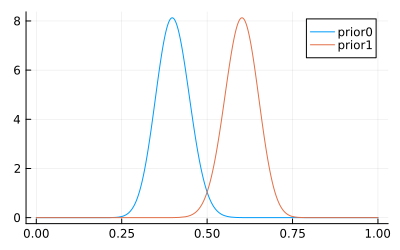

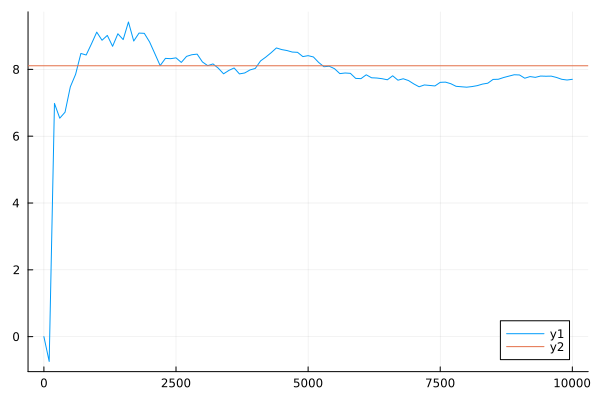

In [187]:
loglikrat_betabinomial(k, n, prior0::BetaBinomial, prior1::BetaBinomial) =
    loglikelihood(BetaBinomial(n, params(prior0)...), k) - loglikelihood(BetaBinomial(n, params(prior1)...), k)

loglikrat_betabinomial(k, n, prior0::Dirac, prior1::Dirac) =
    loglikelihood(Binomial(n, mean(prior0)), k) - loglikelihood(Binomial(n, mean(prior1)), k)

loglikrat(p, prior0, prior1) =
    loglikelihood(prior0, p) - loglikelihood(prior1, p)

function random_llr_bb(; prior0=Beta(4, 6), prior1=Beta(6, 4), p_true=0.4, nmax=1000)
    ber_true = Bernoulli(p_true)
    bbr = zeros(nmax)
    k = 0
    for n in 1:nmax
        k += rand(ber_true)
        bbr[n] = loglikrat_betabinomial(k, n, prior0, prior1)
    end
    bbr
end

prior0 = Beta(40, 60)
prior1 = Beta(60, 40)
p_true = 0.4
nmax = 10000
bbr = random_llr_bb(; prior0, prior1, p_true, nmax)

for N in (10^i for i in 1:10)
    @eval @show loglikrat_betabinomial($(round(Int, N*p_true)), $N, prior0, prior1)
end
@show loglikrat(p_true, prior0, prior1)
@show last(bbr)

plot(prior0; label="prior0")
plot!(prior1; label="prior1")
plot!(size=(400, 250)) |> display

plot(0:100:length(bbr), [0; bbr[10:100:end]])
hline!([loglikrat(p_true, prior0, prior1)])

α = 0.05
β = 0.2
logC0 = log(α / (1 - β)) = -2.772588722239781
logC1 = log((1 - α) / β) = 1.5581446180465497
round.(diff(bbr[1]); sigdigits = 2) = [-0.51, 0.34, 0.33, -0.51, 0.33, 0.33, 0.33, -0.51, 0.33, -0.5, 0.33, -0.5, 0.33, 0.33, 0.33, -0.5, -0.5, 0.32, 0.32, 0.32, 0.32, 0.32, 0.32, 0.32, 0.32, 0.32, 0.32, 0.31, -0.49, -0.49, -0.49, 0.31, 0.31, -0.49, -0.48, 0.31, 0.31, 0.31, -0.48, -0.48, 0.31, 0.31, 0.31, -0.48, -0.47, 0.31, 0.3, 0.3, -0.47, 0.3, 0.3, 0.3, -0.47, -0.47, -0.46, 0.3, 0.3, 0.3, 0.3, -0.46, 0.3, -0.46, 0.3, 0.29, -0.46, 0.29, -0.46, -0.45, 0.29, 0.29, 0.29, 0.29, 0.29, -0.45, 0.29, 0.29, 0.29, 0.29, 0.29, 0.28, -0.45, -0.45, 0.28, 0.28, -0.45, 0.28, 0.28, 0.28, -0.44, 0.28, -0.44, -0.44, -0.44, -0.44, 0.28, -0.43, 0.28, 0.28, 0.28]


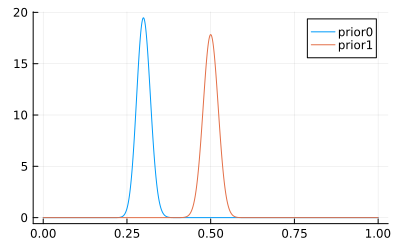

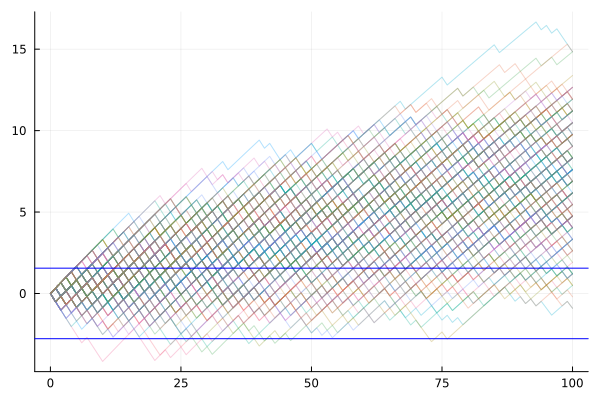

In [221]:
m = 50
prior0 = Beta(3m, 7m)
prior1 = Beta(5m, 5m)
p_true = 0.3
nmax = 100

α = 0.05
β = 0.20
@show α β
@show logC0 = log(α/(1-β))
@show logC1 = log((1-α)/β)

bbr = Vector{Float64}[]
for _ in 1:200
    push!(bbr, random_llr_bb(; prior0, prior1, p_true, nmax))
end

@show round.(diff(bbr[1]); sigdigits=2)

plot(prior0; label="prior0")
plot!(prior1; label="prior1")
plot!(size=(400, 250)) |> display

plot()
for i in eachindex(bbr)
    plot!(0:length(bbr[i]), [0; bbr[i]]; label="", alpha=0.3)
end
#hline!([loglikrat(p_true, prior0, prior1)]; label="", c=:red)
hline!([logC0, logC1]; label="", c=:blue)
plot!()

α = 0.05
β = 0.2
logC0 = log(α / (1 - β)) = -2.772588722239781
logC1 = log((1 - α) / β) = 1.5581446180465497
round.(diff(bbr[1]); sigdigits = 2) = [0.34, 0.34, 0.34, 0.34, 0.34, -0.51, 0.34, 0.34, 0.34, -0.51, 0.34, 0.34, 0.34, 0.34, -0.51, 0.34, -0.51, 0.34, -0.51, 0.34, 0.34, 0.34, 0.34, 0.34, -0.51, 0.34, -0.51, 0.34, 0.34, 0.34, 0.34, 0.34, -0.51, 0.34, 0.34, 0.34, 0.34, -0.51, 0.34, -0.51, 0.34, 0.34, -0.51, -0.51, -0.51, 0.34, 0.34, 0.34, -0.51, 0.34, 0.34, -0.51, -0.51, 0.34, 0.34, 0.34, 0.34, 0.34, -0.51, 0.34, 0.34, 0.34, 0.34, -0.51, 0.34, -0.51, 0.34, -0.51, 0.34, 0.34, -0.51, 0.34, 0.34, -0.51, 0.34, 0.34, 0.34, 0.34, 0.34, 0.34, 0.34, -0.51, 0.34, -0.51, 0.34, 0.34, 0.34, 0.34, 0.34, 0.34, -0.51, 0.34, 0.34, 0.34, 0.34, -0.51, 0.34, -0.51, 0.34]


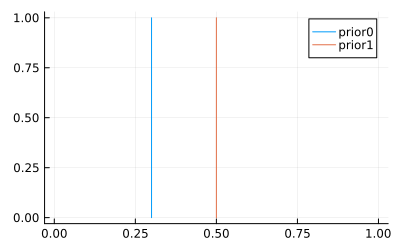

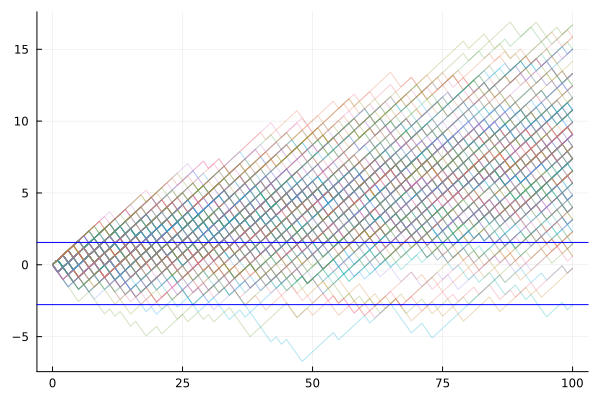

In [222]:
prior0 = Dirac(0.3)
prior1 = Dirac(0.5)
p_true = 0.3
nmax = 100

α = 0.05
β = 0.20
@show α β
@show logC0 = log(α/(1-β))
@show logC1 = log((1-α)/β)

bbr = Vector{Float64}[]
for _ in 1:200
    push!(bbr, random_llr_bb(; prior0, prior1, p_true, nmax))
end

@show round.(diff(bbr[1]); sigdigits=2)

plot(prior0; label="prior0")
plot!(prior1; label="prior1")
plot!(size=(400, 250), xlim=(-0.03, 1.03)) |> display

plot()
for i in eachindex(bbr)
    plot!(0:length(bbr[i]), [0; bbr[i]]; label="", alpha=0.3)
end
#hline!([loglikrat(p_true, prior0, prior1)]; label="", c=:red)
hline!([logC0, logC1]; label="", c=:blue)
plot!()

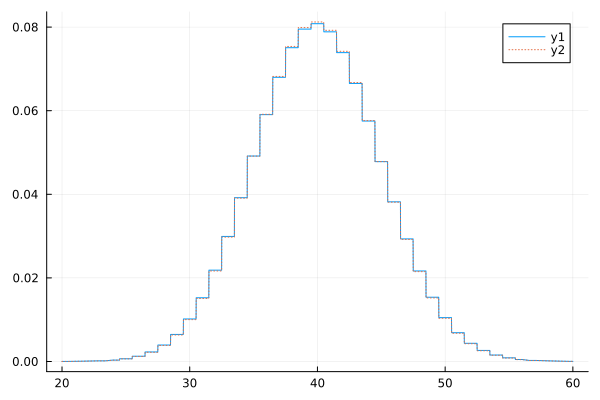

In [209]:
plot(x -> pdf(BetaBinomial(100, 4000, 6000), round(Int, x)), 20, 60)
plot!(x -> pdf(Binomial(100, 0.4), round(Int, x)); ls=:dot)